In [1]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../..'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)

import matplotlib.pyplot as plt
from src.io import read_phenotypes_file

In [2]:
FILEPATH = "C:\\Users\\Hector\\Desktop\\code\\sc_regmod\\dataset\\fenotipos\\fenotipos.csv"
NEW_FILEPATH = "C:\\Users\\Hector\\Desktop\\code\\sc_regmod\\dataset\\fenotipos\\fenotipos_clean.csv"

In [3]:
phenotypes_df = read_phenotypes_file(FILEPATH)

In [4]:
phenotypes_df.head()

,Standard;Haploide-Diploide;SM300-Efficiency;SM300-Rate;SM300-Lag;SM300-AUC;SM60-Efficiency;SM60-Rate;SM60-Lag;SM60-AUC;Ratio-Efficiency;Ratio-Rate;Ratio-Lag;Ratio-AUC;Ecological info
0,AAA;haploide-euploide;NA;NA;NA;NA;NA;NA;NA;NA;...
1,AAB;haploide-euploide;0.44;0.01612;9.22;9.497;...
2,AAC;diploides-euploides;NA;NA;NA;NA;NA;NA;NA;N...
3,AAD;---;1.062;0.03776;6.062;25.59;0.6657;0.026...
4,AAE;haploide-euploide;0.9033;0.03103;9.111;18....


## KEYS

In [8]:
for i in phenotypes_df.keys():
    print(i)

Standard
Haploide-Diploide
SM300-Efficiency
SM300-Rate
SM300-Lag
SM300-AUC
SM60-Efficiency
SM60-Rate
SM60-Lag
SM60-AUC
Ratio-Efficiency
Ratio-Rate
Ratio-Lag
Ratio-AUC
Ecological info


### CLEAN FILE

Chequeamos si existen valores NAN para todas las columnas, sacamos el valor total por columna

In [9]:
phenotypes_missing_data = []
for key in phenotypes_df.keys():
    if key != "Standard" and key != "Haploide-Diploide" and key != "Ecological info":
        has_na = {}
        has_na[key] = phenotypes_df[key].isnull().sum()
        phenotypes_missing_data.append(has_na)

In [10]:
print(phenotypes_missing_data)

[{'SM300-Efficiency': 64}, {'SM300-Rate': 64}, {'SM300-Lag': 64}, {'SM300-AUC': 64}, {'SM60-Efficiency': 64}, {'SM60-Rate': 64}, {'SM60-Lag': 64}, {'SM60-AUC': 64}, {'Ratio-Efficiency': 64}, {'Ratio-Rate': 64}, {'Ratio-Lag': 64}, {'Ratio-AUC': 64}]


In [11]:
print(round(64/phenotypes_df.shape[0], 2))

0.06


Para todas las columnas existen valores NA, lo que representa el **0,06%** de los datos totales, por lo que se limpia el dataset eliminando las filas que presenten valores NaN.

In [13]:
phenotypes_df = phenotypes_df.dropna(axis=0, how='any')
phenotypes_df = phenotypes_df.reset_index(drop=True)

Escribimos el nuevo archivo con los datos limpios.

In [16]:
phenotypes_df.to_csv(NEW_FILEPATH, index=False)

## BOXPLOTS

#### Efficiency

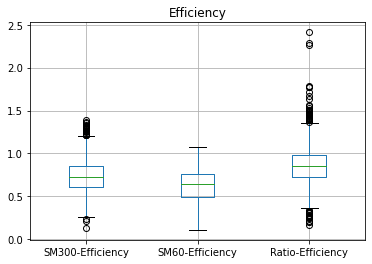

In [17]:
phenotypes_df.boxplot(column=['SM300-Efficiency', 'SM60-Efficiency', 'Ratio-Efficiency'])
plt.title('Efficiency')
plt.show()

#### Rate

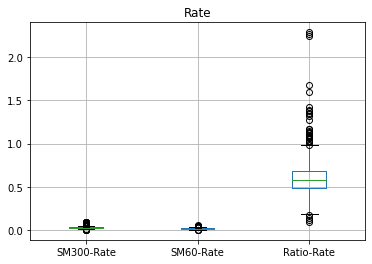

In [18]:
phenotypes_df.boxplot(column=['SM300-Rate', 'SM60-Rate', 'Ratio-Rate'])
plt.title('Rate')
plt.show()

#### Lag

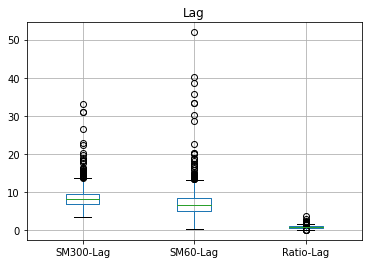

In [19]:
phenotypes_df.boxplot(column=['SM300-Lag', 'SM60-Lag', 'Ratio-Lag'])
plt.title('Lag')
plt.show()

#### AUC

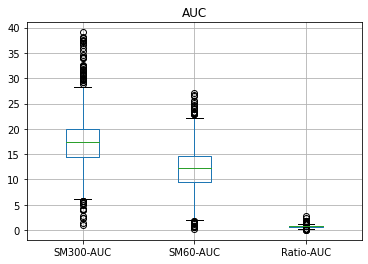

In [20]:
phenotypes_df.boxplot(column=['SM300-AUC', 'SM60-AUC', 'Ratio-AUC'])
plt.title('AUC')
plt.show()

#### Haploide/Diploide

<AxesSubplot:>

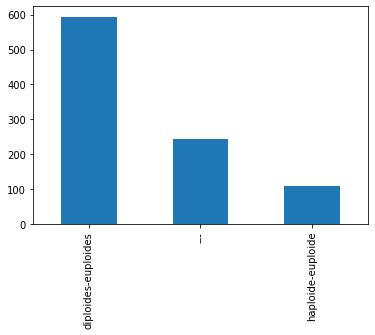

In [21]:
phenotypes_df['Haploide-Diploide'].value_counts().plot(kind='bar')

#### Ecological

<AxesSubplot:>

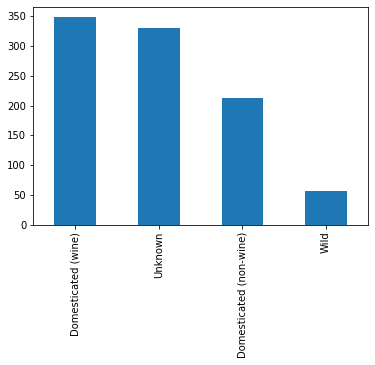

In [22]:
phenotypes_df['Ecological info'].value_counts().plot(kind='bar')